# Lab #9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/NYC_Airbnb/development.csv',
                 index_col = "id" )

In [3]:
df['id'] = df.index

In [4]:
df.isnull().sum()

name                                13
host_id                              0
host_name                           19
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       8041
reviews_per_month                 8041
calculated_host_listings_count       0
availability_365                     0
id                                   0
dtype: int64

Keep just what could be the important features. We need to check if they really are.

In [5]:
importantFeatures = ['id', 'host_id', 'neighbourhood_group', 'latitude',
                     'longitude', 'room_type','price', 'minimum_nights',
                     'number_of_reviews', 'calculated_host_listings_count',
                     'availability_365']                

In [6]:
dfImp = df[importantFeatures].copy()
dfImp.head()

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,,,,,,,,,,,
12783632,12783632,57230304,Queens,40.74037,-73.88610,Private room,75,1,2,3,351
3463385,3463385,10698270,Manhattan,40.76717,-73.95532,Private room,95,1,202,2,263
17572926,17572926,36578169,Manhattan,40.77984,-73.94725,Entire home/apt,130,2,0,1,0
33913644,33913644,50981314,Brooklyn,40.70205,-73.91338,Entire home/apt,150,2,4,1,89
9405895,9405895,48775347,Brooklyn,40.68914,-73.97853,Entire home/apt,325,3,16,1,103


In [7]:
print("Before cleaning #row:", len(dfImp))

Before cleaning #row: 39116


In [8]:
mask = (dfImp.price < 3000) & (dfImp.price != 0)
dfImp = dfImp[mask]

In [9]:
dizNei = {'Manhattan' : 3000,
       'Brooklyn' : 2000,
       'Queens': 1500,
       'Bronx' : 500,
       'Staten Island': 300}

dizRt = {'Entire home/apt': 3500,
       'Private room': 3000,
       'Shared room': 500}

listOfMasks = [(dfImp.price == 0)]
for key, value in dizNei.items():
    listOfMasks.append( (dfImp['neighbourhood_group'] == key) & (dfImp.price > value))

for key, value in dizRt.items():
    listOfMasks.append((dfImp['room_type'] == key) & (dfImp.price > value))

In [10]:
indexesToDiscard = []
for msk in listOfMasks:
    indexesToDiscard.extend(dfImp.index[msk].to_list())

In [11]:
len(indexesToDiscard)

28

In [12]:
dfImp.drop(index = indexesToDiscard, inplace = True)

In [13]:
print("After cleaning #row:", len(dfImp))

After cleaning #row: 39036


Analyze each of the features.

**Neighbourhood_group**

In [14]:
dfImp.neighbourhood_group.value_counts()

Manhattan        17326
Brooklyn         16049
Queens            4503
Bronx              868
Staten Island      290
Name: neighbourhood_group, dtype: int64

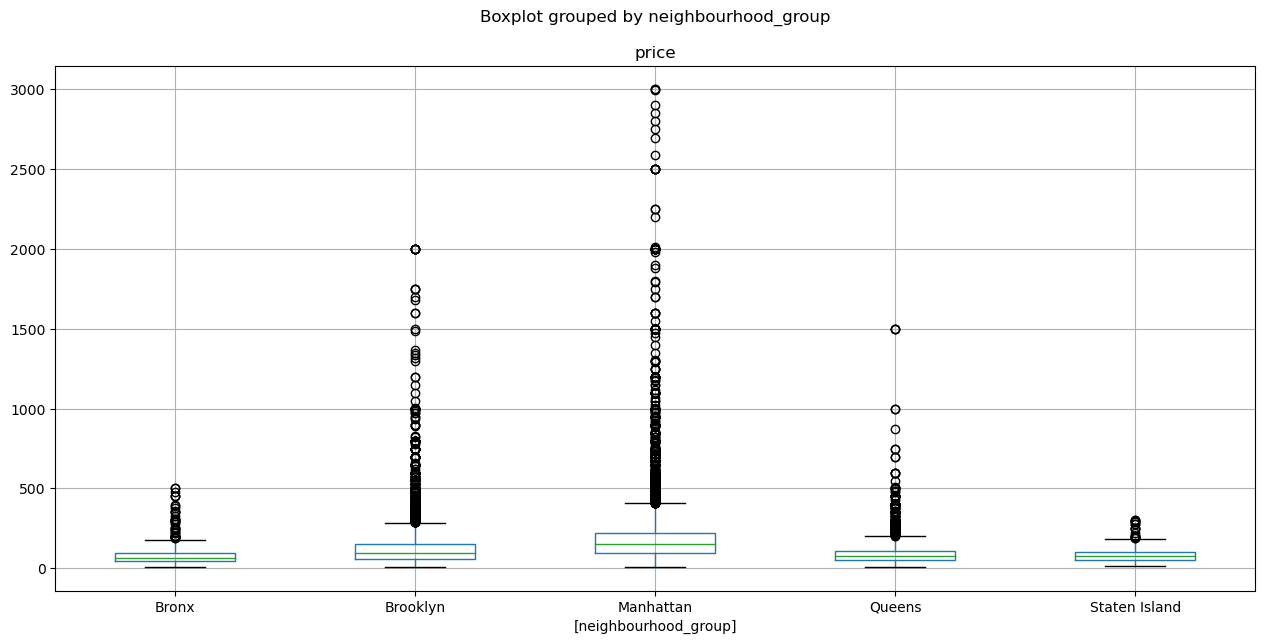

In [15]:
plt.rcParams["figure.figsize"] = (15,7)
dfImp.boxplot(column=['price'], by=['neighbourhood_group'], showfliers = True)
plt.show()

**Room_type**

In [16]:
dfImp.room_type.value_counts()

Entire home/apt    20363
Private room       17769
Shared room          904
Name: room_type, dtype: int64

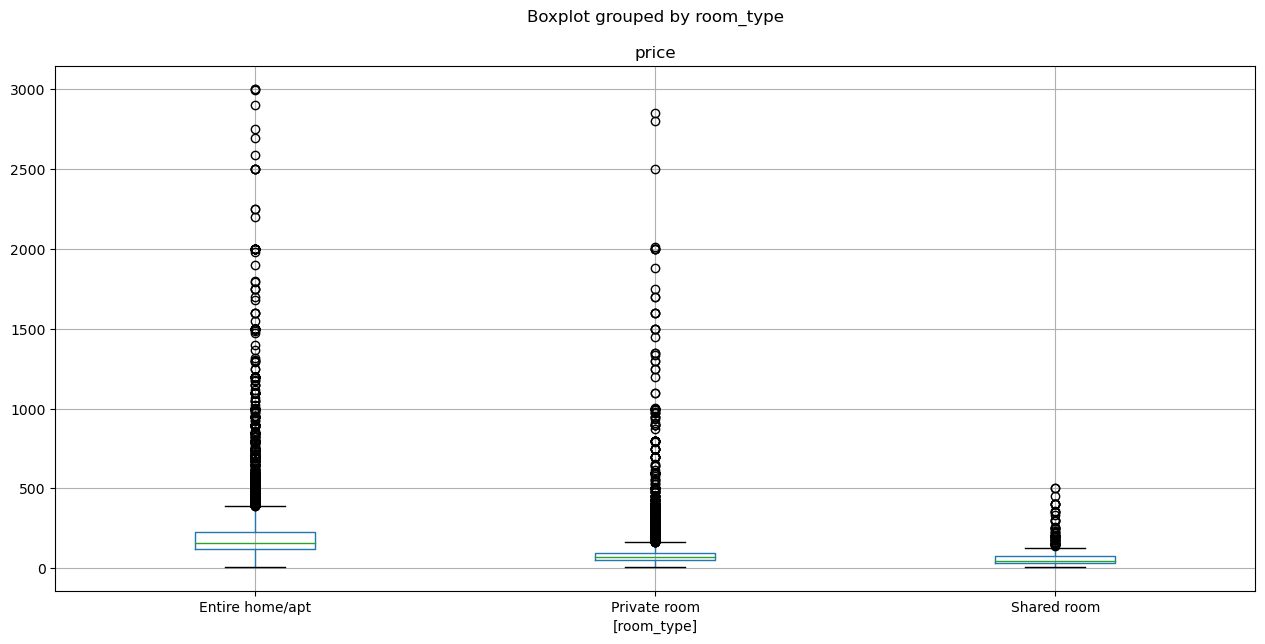

In [17]:
dfImp.boxplot(column=['price'], by=['room_type'], showfliers = True)
plt.show()

**Distribution of prices**

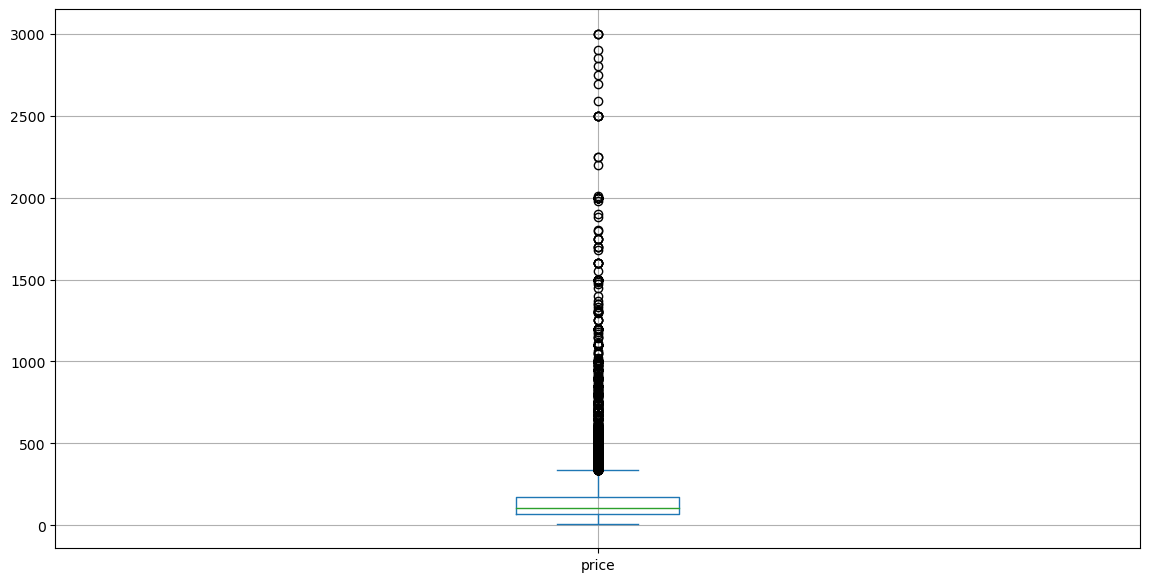

In [18]:
plt.rcParams["figure.figsize"] = (14,7)
dfImp.price.plot.box(showfliers = True)
plt.grid()

We should remove all the prices above 3000 (outliers)

**minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365**

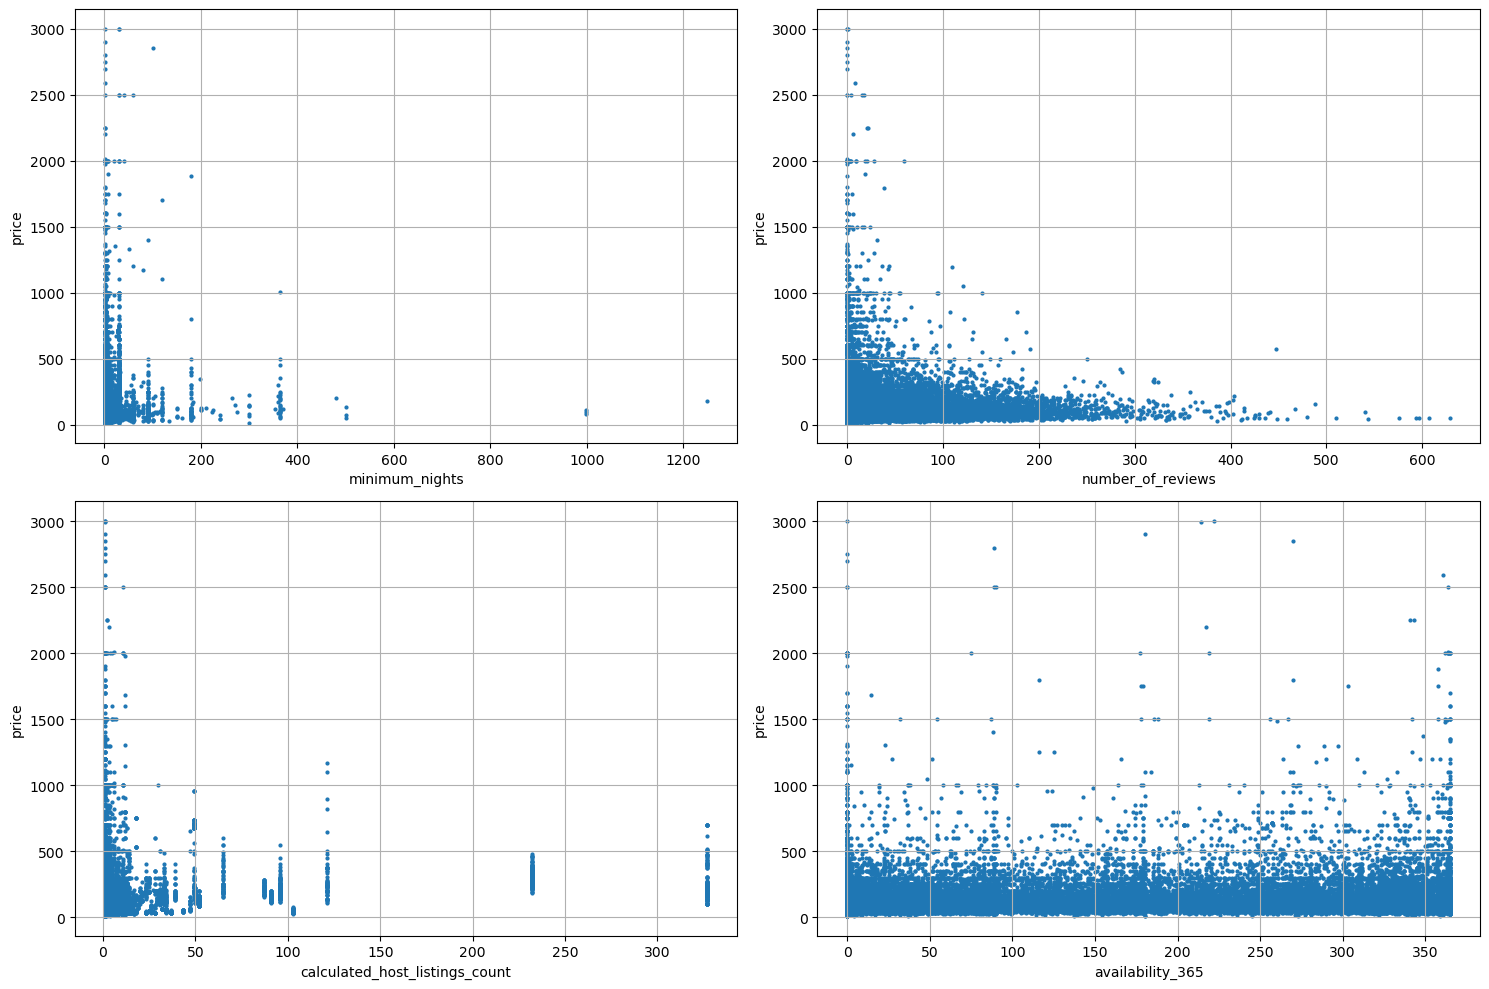

In [19]:
fig, ax = plt.subplots(2 , 2, figsize=(15, 10))
i = [0,0,1,1]
j = [0,1,0,1]
feats = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
for feat, i, j in zip(feats, i, j):
    dfImp.plot(x = feat, y = 'price', kind = 'scatter',s=4, ax = ax[i,j])
    ax[i,j].grid()

plt.tight_layout()
plt.show()

Exploring the categorical features.

In [20]:
oheDfNeighbourhoodDf = pd.get_dummies(dfImp.neighbourhood_group)
oheDfRoomTypeDf = pd.get_dummies(dfImp.room_type)
oheDf = pd.concat([oheDfNeighbourhoodDf, oheDfRoomTypeDf], axis = 1)
oheDf.head(2)

,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
id,,,,,,,,
12783632,0,0,0,1,0,0,1,0
3463385,0,0,1,0,0,0,1,0


In [21]:
dfImp = pd.concat([dfImp.drop(columns=['neighbourhood_group','room_type']), oheDf], axis = 1)
dfImp.head(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
id,,,,,,,,,,,,,,,,,
12783632,12783632,57230304,40.74037,-73.88610,75,1,2,3,351,0,0,0,1,0,0,1,0
3463385,3463385,10698270,40.76717,-73.95532,95,1,202,2,263,0,0,1,0,0,0,1,0


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = dfImp.corr(method='pearson')
columns = correlation.nlargest(10, 'price').index
correlation.price.nlargest(10)

price                             1.000000
Entire home/apt                   0.389582
Manhattan                         0.248238
availability_365                  0.108102
calculated_host_listings_count    0.095746
latitude                          0.049768
minimum_nights                    0.028265
host_id                           0.024447
id                                0.008964
Staten Island                    -0.033665
Name: price, dtype: float64

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = dfImp.corr(method='pearson')
columns = correlation.index
#columns = correlation.nlargest(10, 'price').index

In [24]:
correlation.price

id                                0.008964
host_id                           0.024447
latitude                          0.049768
longitude                        -0.225227
price                             1.000000
minimum_nights                    0.028265
number_of_reviews                -0.057190
calculated_host_listings_count    0.095746
availability_365                  0.108102
Bronx                            -0.065146
Brooklyn                         -0.144338
Manhattan                         0.248238
Queens                           -0.124643
Staten Island                    -0.033665
Entire home/apt                   0.389582
Private room                     -0.365144
Shared room                      -0.084911
Name: price, dtype: float64

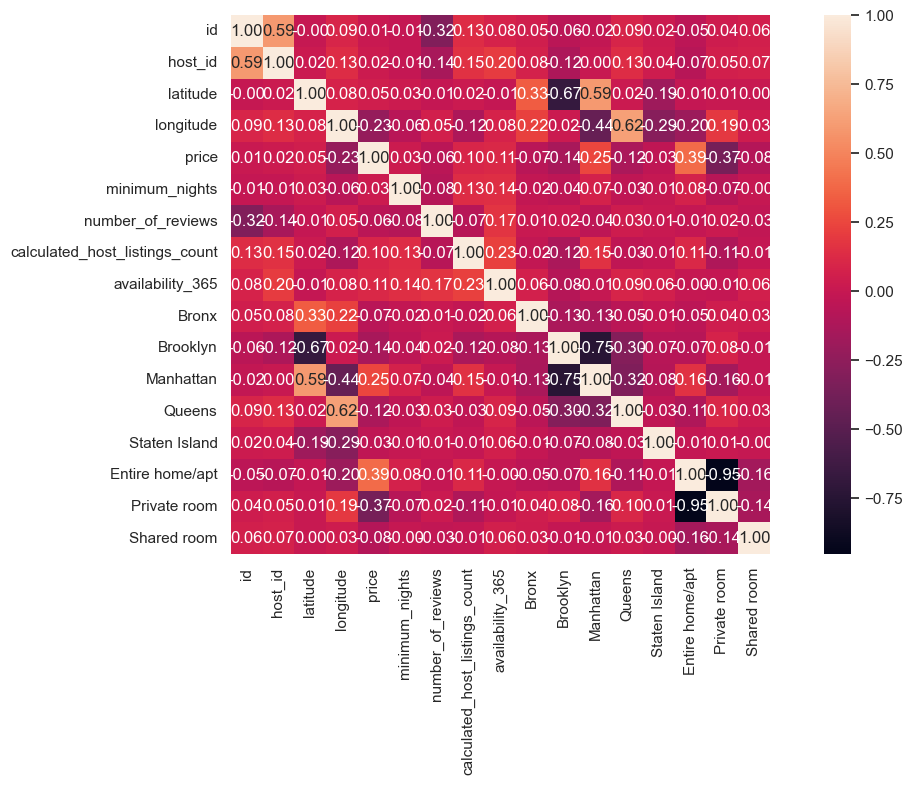

In [25]:
correlation_map = np.corrcoef(dfImp[columns].values.T)
sns.set(font_scale=1)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

Creo X e y rimuovendo price da dfImp

In [26]:
ydf = dfImp['price'].copy()

In [27]:
Xdf = dfImp.drop('price',axis = 1)

In [28]:
Xdf

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
id,,,,,,,,,,,,,,,,
12783632,12783632,57230304,40.74037,-73.88610,1,2,3,351,0,0,0,1,0,0,1,0
3463385,3463385,10698270,40.76717,-73.95532,1,202,2,263,0,0,1,0,0,0,1,0
17572926,17572926,36578169,40.77984,-73.94725,2,0,1,0,0,0,1,0,0,1,0,0
33913644,33913644,50981314,40.70205,-73.91338,2,4,1,89,0,1,0,0,0,1,0,0
9405895,9405895,48775347,40.68914,-73.97853,3,16,1,103,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20678811,20678811,147972663,40.64850,-73.93855,3,58,3,306,0,1,0,0,0,0,1,0
29630190,29630190,223032162,40.68602,-73.99023,2,15,2,0,0,1,0,0,0,0,1,0
3811639,3811639,10603767,40.70784,-73.92224,3,203,1,308,0,1,0,0,0,1,0,0


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
            Xdf, ydf, train_size=0.7, random_state=42, shuffle=True)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.pipeline import make_pipeline

from prettytable import PrettyTable

degree = 10
models = [
    LinearRegression(),
    Ridge(random_state=42),
    RandomForestRegressor(n_estimators=300),
    make_pipeline(
        make_column_transformer(
            (FunctionTransformer(np.sin), [0]),
            (PolynomialFeatures(degree), [0])
        ),
        LinearRegression()
    ),
    make_pipeline(
        make_column_transformer(
            (FunctionTransformer(np.sin), [0]),
            (PolynomialFeatures(degree), [0])
        ),
        Ridge(alpha=1)
    )
]

names = [
    'linreg',
    'ridge',
    'rf',
    f'sin+poly{degree}+linreg',
    f'sin+poly{degree}+ridge'
]

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']

for model, name in zip(models, names):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mse = mean_squared_error(y_test, y_hat)
    r2 = r2_score(y_test, y_hat)
    t.add_row([name, mse, r2])

print(t)

C:\Users\jacop\anaconda3\envs\dslab\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.43046e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


+-------------------+--------------------+-----------------------+
|       model       |        MSE         |           R2          |
+-------------------+--------------------+-----------------------+
|       linreg      | 19837.44594081497  |   0.2078945115109725  |
|       ridge       | 19836.781730760787 |  0.20792103329361522  |
|         rf        | 16614.271910540898 |   0.3365952448287872  |
| sin+poly10+linreg | 24977.412892124015 | 0.0026565970671917905 |
|  sin+poly10+ridge | 24931.03677626993  |  0.004508386658070629 |
+-------------------+--------------------+-----------------------+


C:\Users\jacop\anaconda3\envs\dslab\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.95519e-155): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


The model that seems to work well is random forest. Let's train that.

Let's find the best parameters

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
param_grid = {'n_estimators': [100, 200, 300, 700],
              'max_features': [1.0, 'sqrt']
              }
gridsearch = GridSearchCV(reg, param_grid, scoring = 'neg_mean_squared_error', cv = 5)

res = gridsearch.fit(Xdf, ydf)

print("Best model configuration is:")
print(res.best_params_)
print("with mse=%.2f" % res.best_score_)

Best model configuration is:
{'max_features': 'sqrt', 'n_estimators': 700}
with mse=-13772.54


In [33]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=300, max_features='sqrt')
reg.fit(Xdf,ydf)

RandomForestRegressor(max_features='sqrt', n_estimators=300)

In [34]:
X_test = pd.read_csv('data/NYC_Airbnb/evaluation.csv', index_col = 'id')

In [35]:
importantFeaturesTest = ['id',
                         'host_id',
                         'neighbourhood_group',
                          'latitude',
                          'longitude',
                          'room_type',
                          'minimum_nights',
                          'number_of_reviews',
                          'calculated_host_listings_count',
                          'availability_365']

In [36]:
X_test['id'] = X_test.index
X_test = X_test[importantFeaturesTest]
X_test.head()

,id,host_id,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,,,,,,,,,,
2539,2539,2787,Brooklyn,40.64749,-73.97237,Private room,1,9,6,365
5121,5121,7356,Brooklyn,40.68688,-73.95596,Private room,45,49,1,0
5203,5203,7490,Manhattan,40.80178,-73.96723,Private room,2,118,1,0
5238,5238,7549,Manhattan,40.71344,-73.99037,Entire home/apt,1,160,4,188
6848,6848,15991,Brooklyn,40.70837,-73.95352,Entire home/apt,2,148,1,46


In [37]:
oheDfNeighbourhoodDf = pd.get_dummies(X_test.neighbourhood_group)
oheDfRoomTypeDf = pd.get_dummies(X_test.room_type)
oheDf = pd.concat([oheDfNeighbourhoodDf, oheDfRoomTypeDf], axis = 1)

In [38]:
X_test = pd.concat([X_test.drop(columns=['neighbourhood_group','room_type']), oheDf], axis = 1)

In [39]:
X_test.head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
id,,,,,,,,,,,,,,,,
2539,2539,2787,40.64749,-73.97237,1,9,6,365,0,1,0,0,0,0,1,0
5121,5121,7356,40.68688,-73.95596,45,49,1,0,0,1,0,0,0,0,1,0
5203,5203,7490,40.80178,-73.96723,2,118,1,0,0,0,1,0,0,0,1,0
5238,5238,7549,40.71344,-73.99037,1,160,4,188,0,0,1,0,0,1,0,0
6848,6848,15991,40.70837,-73.95352,2,148,1,46,0,1,0,0,0,1,0,0


In [40]:
X_test_index = X_test.index

In [41]:
X_test_index

Int64Index([    2539,     5121,     5203,     5238,     6848,     7322,
                7726,     7750,     8025,     9783,
            ...
            36455809, 36455917, 36457700, 36476675, 36477307, 36478343,
            36481315, 36482809, 36484665, 36485057],
           dtype='int64', name='id', length=9779)

In [42]:
y_test_pred = reg.predict(X_test)

In [43]:
to_csv = pd.Series(y_test_pred, index = X_test_index, name = 'Predicted')
to_csv.index.names = ['Id']
to_csv.to_csv('submissions/submission.csv')